In [1]:
from arcgis.gis import GIS

gis = GIS("http://slustl.maps.arcgis.com/home", "gregbrunner_slugis")

Enter password: ········


# What is a [Feature Set](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html?highlight=featureset#arcgis.features.FeatureSet)?

A set of features with information about their fields, field aliases, geometry type, spatial reference etc.

**It is the actual features!!!**

## For example

When we query a feature layer, we get the actual features back as a **Feature Set**

In [2]:
from arcgis.features import FeatureLayer

url = "https://services2.arcgis.com/bB9Y1bGKerz1PTl5/arcgis/rest/services/national_rainfall_data_demogjb_1/FeatureServer/0"
fl = FeatureLayer(url, gis = gis)
fl_query = fl.query()
fl_query

<FeatureSet> 8766 features

## They have geometries, fields, attibutes, etc.

In [3]:
fl_query.features

[{"geometry": {"x": -10288013.310447428, "y": 4978397.188103158}, "attributes": {"FID": 1, "GaugeLID": "BMFI4", "Status": "not_defined", "Location": "Bloomfield", "Latitude": 40.769466, "Longitude": -92.418796, "Waterbody": "Fox River (IA/MO)", "State": "IA", "Observed": "3.39", "ObsTime": "2018-07-20 20:00:00", "Units": "ft", "Action": " ", "Flood": " ", "Moderate": " ", "Major": " ", "LowThresh": " ", "LowThreshU": "ft", "WFO": "dmx", "HDatum": "NAD83/WGS84", "PEDTS": "HGIRG", "SecValue": "0.05", "SecUnit": "kcfs", "URL": "https://water.weather.gov/ahps2/hydrograph.php?wfo=dmx&gage=bmfi4"}},
 {"geometry": {"x": -9910557.860235045, "y": 4934762.781174089}, "attributes": {"FID": 2, "GaugeLID": "BMII2", "Status": "no_flooding", "Location": "Bloomington", "Latitude": 40.471944, "Longitude": -89.028056, "Waterbody": "Sugar Creek (IL)", "State": "IL", "Observed": "0.84", "ObsTime": "2018-07-20 19:30:00", "Units": "ft", "Action": "7.00", "Flood": "11.00", "Moderate": " ", "Major": " ", "Low

## The fields

In [4]:
fl_query.fields

[{'name': 'FID',
  'type': 'esriFieldTypeOID',
  'alias': 'FID',
  'sqlType': 'sqlTypeInteger',
  'domain': None,
  'defaultValue': None},
 {'name': 'GaugeLID',
  'type': 'esriFieldTypeString',
  'alias': 'GaugeLID',
  'sqlType': 'sqlTypeNVarchar',
  'length': 5,
  'domain': None,
  'defaultValue': None},
 {'name': 'Status',
  'type': 'esriFieldTypeString',
  'alias': 'Status',
  'sqlType': 'sqlTypeNVarchar',
  'length': 15,
  'domain': None,
  'defaultValue': None},
 {'name': 'Location',
  'type': 'esriFieldTypeString',
  'alias': 'Location',
  'sqlType': 'sqlTypeNVarchar',
  'length': 90,
  'domain': None,
  'defaultValue': None},
 {'name': 'Latitude',
  'type': 'esriFieldTypeDouble',
  'alias': 'Latitude',
  'sqlType': 'sqlTypeFloat',
  'domain': None,
  'defaultValue': None},
 {'name': 'Longitude',
  'type': 'esriFieldTypeDouble',
  'alias': 'Longitude',
  'sqlType': 'sqlTypeFloat',
  'domain': None,
  'defaultValue': None},
 {'name': 'Waterbody',
  'type': 'esriFieldTypeString',
 

# What is a [Feature Layer](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html?highlight=featureset#featurelayer)?

The feature layer is the primary concept for working with features in a GIS. It is a representation of the actual features (a feature set) on a map. When we use the term **Feature Layer** in WebGIS, we are ususally talking about a service in ArcGIS Online that allows the user to visualize the features on a map.

Users create, import, export, analyze, edit, and visualize features, i.e. entities in space as feature layers.

Feature layers can be added to and visualized using maps. They act as inputs to and outputs from feature analysis tools.

## For example

That layer that we just queried, we can visualize it as a layer on a map, becuase it is a **Feature Layer**.

In [7]:
# We add a feature layer to the map to see the features
m = gis.map('USA')
m.add_layer(fl)
m

MapView(layout=Layout(height='400px', width='100%'))

# What is a [FeatureCollection](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html?highlight=featureset#featurecollection)?

FeatureCollection is an object with a layer definition and a feature set. It is an in-memory collection of features with rendering information.

## This is more abstract

It is not a service, it's just a way for ArcGIS Online to store an object like a dataframe that you visualize on a map. Of the 200+ items in my SLU ArcGIS Online account, I only have 5 FeatureCollections. You probably have 0.

<Item title:"UNHCR FRA" type:Feature Collection owner:gregbrunner_slugis>
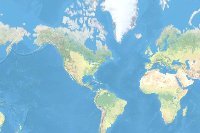

In [16]:
feature_collection  = gis.content.get('b21db5da4805471ba14f611f560054cf')
feature_collection

### Notice that it's a feature layer collection? Why? Got to the link!

There is not service url and the data is just JSON!

## What does it look like in a notebook?

In [24]:
feature_collection.get_data()

{'featureCollection': {'layers': [{'layerDefinition': {'currentVersion': 10.61,
     'id': 0,
     'name': '',
     'type': 'Feature Layer',
     'displayField': '',
     'description': '',
     'copyrightText': '',
     'defaultVisibility': True,
     'relationships': [],
     'isDataVersioned': False,
     'supportsAppend': True,
     'supportsCalculate': True,
     'supportsTruncate': False,
     'supportsAttachmentsByUploadId': True,
     'supportsAttachmentsResizing': True,
     'supportsRollbackOnFailureParameter': True,
     'supportsStatistics': True,
     'supportsAdvancedQueries': True,
     'supportsValidateSql': True,
     'supportsCoordinatesQuantization': True,
     'supportsQuantizationEditMode': True,
     'supportsApplyEditsWithGlobalIds': False,
     'advancedQueryCapabilities': {'supportsPagination': True,
      'supportsPaginationOnAggregatedQueries': True,
      'supportsQueryRelatedPagination': True,
      'supportsQueryWithDistance': True,
      'supportsReturnin

## Can I add this to a map?

In [25]:
m2 = gis.map('France')
m2

MapView(layout=Layout(height='400px', width='100%'))

## Doesn't easily add to map

In [22]:
m2.add_layer(feature_collection)

TypeError: 'NoneType' object is not iterable

# What is a Feature [Layer Collection](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html?highlight=featureset#featurelayercollection)?

A FeatureLayerCollection is a collection of feature layers and tables, with the associated relationships among the entities.

In a web GIS, a feature layer collection is exposed as a feature service with multiple feature layers.

## For example

Any item **Feature Service** ArcGIS Online that contains multiple layers, such as ** Tapestry Segmentation**. This has layers for different adminisrative boundaries.

<Item title:"Tapestry_Households" type:Feature Layer Collection owner:esri_demographics>
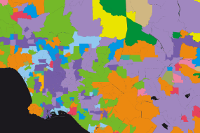

In [37]:
tapestry_segmentation = gis.content.search("Esri 2014 Tapestry_Households", outside_org=True, item_type='Feature Service')[0]
tapestry_segmentation

## Again, why is this a feature layer collection?

Becuase it has multiple layers:

In [39]:
tapestry_segmentation.layers

[<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/Tapestry_Households/FeatureServer/0">,
 <FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/Tapestry_Households/FeatureServer/1">,
 <FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/Tapestry_Households/FeatureServer/2">]

In [45]:
flc_map1 = gis.map('USA')
flc_map1.add_layer(tapestry_segmentation.layers[0])
flc_map1

MapView(layout=Layout(height='400px', width='100%'))

In [48]:
flc_map2 = gis.map('St. Louis, Missouri')
flc_map2.add_layer(tapestry_segmentation.layers[2])
flc_map2

MapView(layout=Layout(height='400px', width='100%'))